In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
from itertools import cycle
import soundfile as sf


In [8]:
# Seaborn visualization setup
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [9]:
# Path to the nested folder structure
audio_files = glob('genres_original/**/*.wav')

# Output directories for saving plots and MFCC features
output_dir = 'output'
spectrogram_dir = os.path.join(output_dir, 'spectrogram_plots')
mel_spectrogram_dir = os.path.join(output_dir, 'mel_spectrogram_plots')
mfcc_dir = os.path.join(output_dir, 'mfcc_features')
os.makedirs(spectrogram_dir, exist_ok=True)
os.makedirs(mel_spectrogram_dir, exist_ok=True)
os.makedirs(mfcc_dir, exist_ok=True)

In [10]:
# Function to augment audio
def augment_audio(y):
    y_pitch_shifted = librosa.effects.pitch_shift(y=y,sr=22050, n_steps=4)
    y_time_stretched = librosa.effects.time_stretch(y=y,rate=1.5)
    noise = np.random.randn(len(y))
    y_noisy = y + 0.005 * noise
    return [y_pitch_shifted, y_time_stretched, y_noisy]

In [11]:
def process_audio_file(y, sr, file_basename, augment_index=None):
    # Load the audio file
    suffix = f'aug{augment_index}' if augment_index is not None else ''
    y, sr = librosa.load(wav_file)
    
    # Compute and save STFT spectrogram plot
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    fig, ax = plt.subplots(figsize=(4,4))
    img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
    ax.set_title(f'Spectrogram Waveform of {os.path.basename(wav_file)}', fontsize=20)
    fig.colorbar(img, ax=ax, format='%0.2f')
    spectrogram_filename = os.path.join(spectrogram_dir, f'{os.path.splitext(os.path.basename(wav_file))[0]}.png')
    plt.savefig(spectrogram_filename)
    plt.close(fig)
    
    # Compute and save Mel spectrogram plot
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    fig, ax = plt.subplots(figsize=(4,4))
    img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
    ax.set_title(f'Mel Spectrogram Waveform of {os.path.basename(wav_file)}', fontsize=20)
    fig.colorbar(img, ax=ax, format='%0.2f')
    mel_spectrogram_filename = os.path.join(mel_spectrogram_dir, f'{os.path.splitext(os.path.basename(wav_file))[0]}.png')
    plt.savefig(mel_spectrogram_filename)
    plt.close(fig)
    
    # Compute and save MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_filename = os.path.join(mfcc_dir, f'{os.path.splitext(os.path.basename(wav_file))[0]}.csv')
    mfcc_df = pd.DataFrame(mfccs)
    mfcc_df.to_csv(mfcc_filename, index=False)

KeyboardInterrupt: 

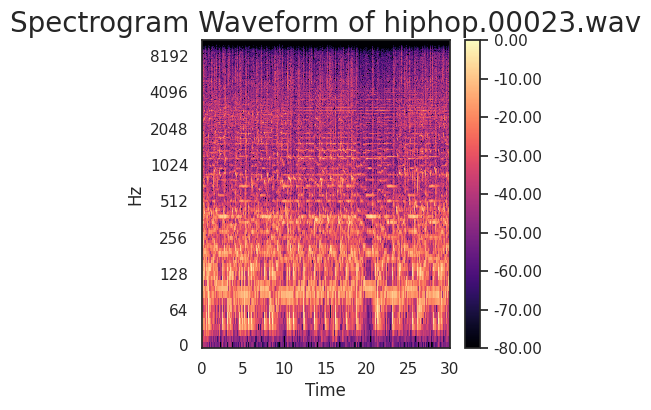

In [12]:
for wav_file in audio_files:
    file_basename = os.path.splitext(os.path.basename(wav_file))[0]
    # Load the audio file
    y, sr = librosa.load(wav_file)
    # Process the original audio file
    process_audio_file(y, sr, file_basename)
    # Augment the audio and process augmented versions
    augmented_audios = augment_audio(y)
    for i, aug_y in enumerate(augmented_audios):
        augmented_filename = os.path.join(output_dir, f'{file_basename}aug{i}.wav')
        sf.write(augmented_filename, aug_y, sr)
        process_audio_file(aug_y, sr, file_basename, augment_index=i)
        os.remove(augmented_filename)

In [ ]:
print(librosa.__version__)